In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('Social_Network_Ads.csv')

In [3]:
df=df.iloc[:,2:]


In [4]:
df.sample(5)

,Age,EstimatedSalary,Purchased
235,46,79000,1
305,42,54000,0
329,47,107000,1
183,33,43000,0
10,26,80000,0


In [5]:
from sklearn.model_selection import train_test_split
 
x_train,x_test,y_train,y_test=train_test_split(df.drop('Purchased',axis=1,),df['Purchased'],test_size=0.3,random_state=0)
x_train.shape,x_test.shape

((280, 2), (120, 2))

In [6]:
x_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)
x_train.shape,x_test.shape

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)


AttributeError: 'StandardScaler' object has no attribute 'mean'

In [15]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [16]:
x_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [17]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)
                           
                          


In [18]:
x_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [20]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [22]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


Text(0.5, 1.0, 'after_scalling')

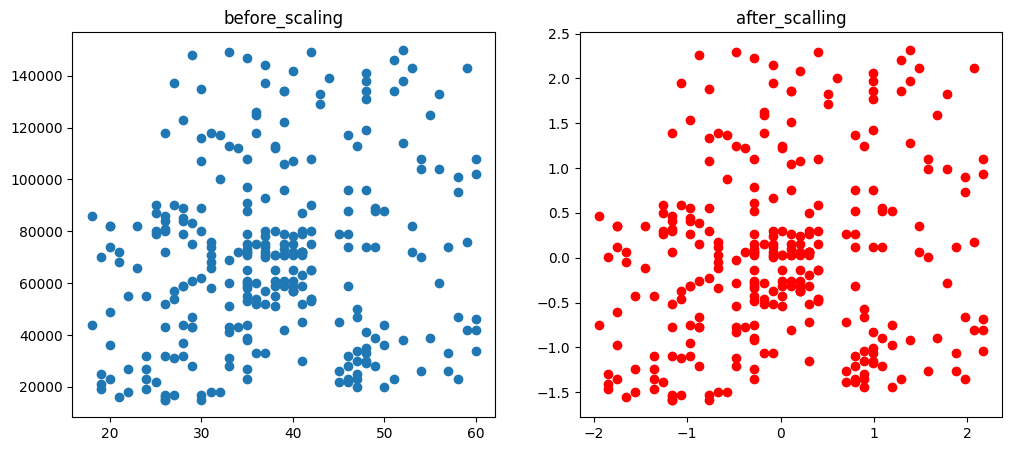

In [29]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(x=x_train['Age'],y=x_train['EstimatedSalary'])
ax1.set_title('before_scaling')
ax2.scatter(x=x_train_scaled['Age'],y=x_train_scaled['EstimatedSalary'],color='red')
ax2.set_title('after_scalling')

<AxesSubplot: title={'center': 'age adter scaling'}, xlabel='Age', ylabel='Density'>

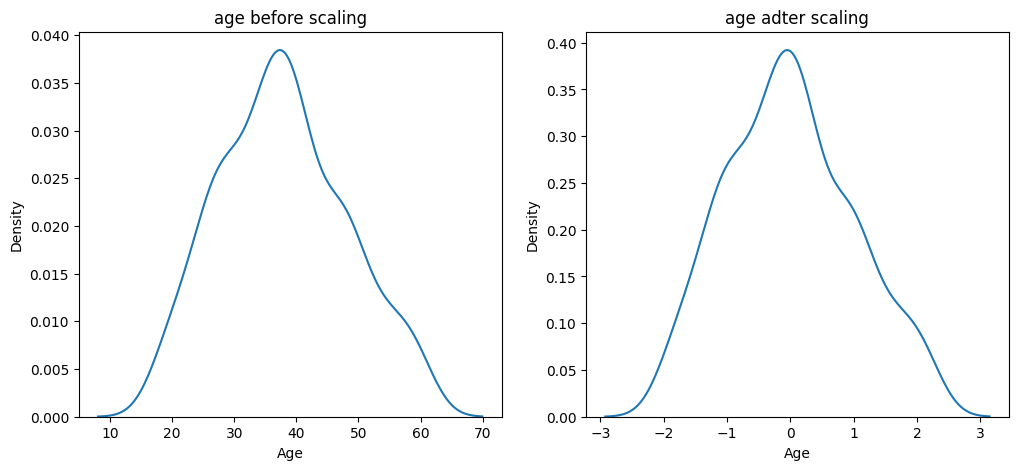

In [34]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title('age before scaling')
sns.kdeplot(x_train['Age'],ax=ax1)
ax2.set_title('age adter scaling')
sns.kdeplot(x_train_scaled['Age'],ax=ax2)


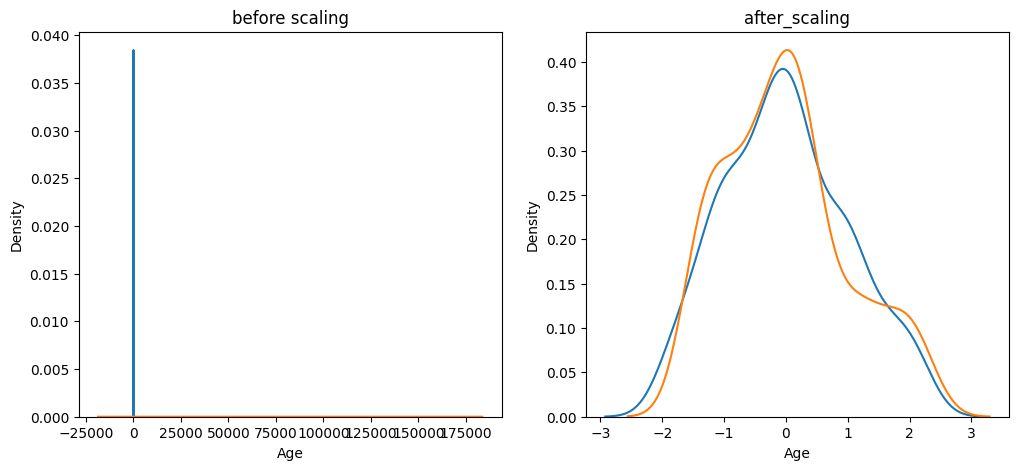

In [44]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title('before scaling')
sns.kdeplot(x_train['Age'],ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)

ax2.set_title('after_scaling')
sns.kdeplot(x_train_scaled['Age'],ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

In [46]:
from sklearn.linear_model import LogisticRegression

In [51]:
jk=LogisticRegression()
jke_scaled=LogisticRegression()

In [54]:
jk.fit(x_train,y_train)
jke_scaled.fit(x_train_scaled,y_train)


LogisticRegression()

In [56]:
y_pred=jk.predict(x_test)
y_pred_scaled=jke_scaled.predict(x_test_scaled)

In [58]:
from sklearn.metrics import accuracy_score

In [61]:
print('actual',accuracy_score(y_test,y_pred))
print('scaled',accuracy_score(y_test,y_pred_scaled))

actual 0.6583333333333333
scaled 0.8666666666666667
